<a href="https://colab.research.google.com/github/chavgova/My-AI/blob/master/emotion_recognition_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT

In [8]:
#this is the copy of another projecct and ill make changes to see how i can make it better 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os

In [9]:
from google.colab import drive
import os

path = '/content/drive/My Drive/My_AI/RawData'

mylist = []
mylist = os.listdir(path)

print(mylist)	



['03-01-02-01-01-02-16.wav', '03-01-07-02-01-02-15.wav', '03-01-08-01-02-01-15.wav', '03-01-03-01-02-01-16.wav', '03-01-08-02-01-02-15.wav', '03-01-02-01-02-01-16.wav', '03-01-02-01-02-02-16.wav', '03-01-07-02-02-01-15.wav', '03-01-07-01-02-02-15.wav', '03-01-08-01-01-02-15.wav', '03-01-03-01-01-02-16.wav', '03-01-03-01-01-01-16.wav', '03-01-02-02-01-02-16.wav', '03-01-08-01-02-02-15.wav', '03-01-02-02-02-02-16.wav', '03-01-08-02-01-01-15.wav', '03-01-01-01-02-01-16.wav', '03-01-07-02-01-01-15.wav', '03-01-02-02-02-01-16.wav', '03-01-01-01-01-01-16.wav', '03-01-08-02-02-02-15.wav', '03-01-02-02-01-01-16.wav', '03-01-06-02-01-02-15.wav', '03-01-08-02-02-01-15.wav', '03-01-01-01-01-02-16.wav', '03-01-01-01-02-02-16.wav', '03-01-06-02-02-02-15.wav', '03-01-08-01-01-01-15.wav', '03-01-02-01-01-01-16.wav', '03-01-07-01-01-01-15.wav', '03-01-07-02-02-02-15.wav', '03-01-06-02-02-01-15.wav', '03-01-07-01-02-01-15.wav', '03-01-05-02-02-01-16.wav', '03-01-04-01-01-02-16.wav', '03-01-06-01-01-02-

In [10]:
print(mylist[50])

03-01-06-01-02-01-16.wav


In [11]:
print(mylist[18][6:-16])

02


LABLES

In [12]:
feeling_list=[]
for item in mylist:
    if int(item[18:-4])%2==0:  #female
        if item[6:-16]=='01':
          feeling_list.append('female_neutral')
        elif item[6:-16]=='02':
          feeling_list.append('female_calm')
        elif item[6:-16]=='03':
          feeling_list.append('female_happy')
        elif item[6:-16]=='04':
          feeling_list.append('female_sad')
        elif item[6:-16]=='05':
          feeling_list.append('female_angry')
        elif item[6:-16]=='06':
          feeling_list.append('female_fearful')
        elif item[6:-16]=='07':
          feeling_list.append('female_disgust')
        elif item[6:-16]=='08':
          feeling_list.append('female_surprised')
    else:
      if item[6:-16]=='01':
        feeling_list.append('male_neutral')
      elif item[6:-16]=='02':
        feeling_list.append('male_calm')
      elif item[6:-16]=='03':
        feeling_list.append('male_happy')
      elif item[6:-16]=='04':
        feeling_list.append('male_sad')
      elif item[6:-16]=='05':
        feeling_list.append('male_angry')
      elif item[6:-16]=='06':
        feeling_list.append('male_fearful')
      elif item[6:-16]=='07':
        feeling_list.append('male_disgust')
      elif item[6:-16]=='08':
        feeling_list.append('male_surprised')


In [13]:
import pandas as pd

labels = pd.DataFrame(feeling_list)
labels[:10]      #print

,0
0,female_calm
1,male_disgust
2,male_surprised
3,female_happy
4,male_surprised
5,female_calm
6,female_calm
7,male_disgust
8,male_disgust
9,male_surprised


Getting the features of audio files using librosa

In [14]:
import librosa
import numpy as np

def extract_feature(my_file, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    X, sample_rate = librosa.core.load(my_file)
    if chroma or contrast:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result = np.hstack((result, mel))
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, contrast))
    if tonnetz:
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
        result = np.hstack((result, tonnetz))

    return result

f = os.fspath('/content/drive/My Drive/My_AI/RawData/03-01-08-01-01-02-01.wav')
a = extract_feature(f, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True)
#print(a, a.shape)

In [15]:
df = pd.DataFrame(columns=['all_features'])
bookmark=0

#mylist = mylist[:100]
for index,y in enumerate(mylist):
      all_features_ndarray = extract_feature('/content/drive/My Drive/My_AI/RawData/'+y, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True)
      df.loc[bookmark] = [all_features_ndarray]
      bookmark=bookmark+1
        
#df[:5]    #print 


In [16]:
df3 = pd.DataFrame(df['all_features'].values.tolist())

In [17]:
newdf = pd.concat([df3,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
rnewdf[:10]     #print

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,0
0,-647.855547,55.161974,6.022664,11.279636,1.494477,-10.823069,-9.768314,-3.426524,-5.141561,-3.937714,-9.222471,-2.322059,-3.491471,-3.229235,-2.588595,-6.148681,-4.438408,-3.765655,-6.711987,-2.241300,-5.629476,-3.342788,-5.519323,-2.143104,-3.962271,0.580401,-0.845263,0.836235,-1.663852,0.103594,-1.442232,2.398137,1.210933,1.309208,-1.149667,0.796317,-0.387185,1.851878,1.965089,2.852826,...,0.000028,0.000056,0.000062,0.000073,0.000086,0.000148,0.000405,0.000204,0.000275,0.000194,0.000097,0.000089,0.000097,0.000078,0.000133,0.000146,0.000158,0.000236,0.000160,0.000115,0.000124,0.000239,0.000243,0.000193,0.000037,4.089572e-06,19.825734,17.413286,18.683788,17.631371,17.597609,17.479021,27.669175,0.008979,0.002485,-0.011113,0.007860,-0.022812,0.010703,female_calm
1,-563.963067,84.188943,-3.152482,14.670623,14.059518,1.252880,0.042044,-4.397226,-4.238579,4.932143,4.076926,4.698377,2.391880,3.431389,2.035749,4.756171,2.224375,1.005362,4.411248,3.984690,-0.575655,5.080584,1.983271,6.256003,0.638210,3.379015,1.574879,5.086869,-0.242717,3.516233,2.506099,4.326962,3.277128,3.450532,1.574356,5.171896,1.693470,1.381288,0.377714,0.676257,...,0.000131,0.000161,0.000127,0.000110,0.000103,0.000081,0.000054,0.000073,0.000041,0.000052,0.000044,0.000038,0.000035,0.000044,0.000065,0.000059,0.000042,0.000044,0.000062,0.000066,0.000068,0.000047,0.000039,0.000038,0.000023,2.302145e-06,23.765040,14.047504,17.620982,16.756985,18.187620,18.827449,29.978436,-0.033824,0.031722,-0.020895,0.045294,0.001301,0.021214,male_disgust
2,-594.637783,67.321998,-8.268769,11.827235,11.677641,-2.248863,-0.757726,-1.896019,-6.689641,2.705992,1.314382,1.545111,-2.906595,1.502054,2.958313,1.123918,0.773195,-2.079359,-0.045413,-0.557165,-4.386110,0.844472,-1.391011,-0.348034,-2.591043,2.353713,-1.338228,2.886713,-1.977508,3.363003,1.152010,1.973229,0.534796,1.680699,-0.927337,2.229836,-1.213668,0.681434,-0.775523,-0.460335,...,0.000236,0.000162,0.000102,0.000152,0.000227,0.000257,0.000131,0.000087,0.000106,0.000106,0.000104,0.000086,0.000044,0.000047,0.000054,0.000035,0.000028,0.000023,0.000019,0.000029,0.000032,0.000036,0.000037,0.000031,0.000011,7.863616e-07,19.929019,14.123903,15.800768,15.526285,16.498655,18.605405,29.240658,-0.004248,0.026129,-0.065590,-0.075824,0.024136,0.000908,male_surprised
3,-579.891136,42.039627,-5.053938,7.798847,-0.126285,-9.143354,-12.422559,-8.201250,-6.497337,-1.633368,-9.284363,-4.746703,-2.252793,-5.042223,-4.782923,-4.012217,-5.518520,-4.907112,-4.995540,-4.075550,-5.216173,-5.194875,-4.929390,-4.127506,-6.202564,-0.801092,-1.592606,2.628457,-0.227953,1.161160,-3.117599,-1.825591,-3.542235,-0.268574,0.695758,5.276096,4.330442,3.046888,0.705429,0.176194,...,0.000343,0.000465,0.000726,0.000588,0.000524,0.000399,0.000546,0.000814,0.000702,0.000639,0.000532,0.001084,0.000709,0.000725,0.000817,0.000606,0.000388,0.000592,0.001056,0.001199,0.001075,0.001202,0.000646,0.000797,0.000216,8.414706e-06,21.887936,17.434534,18.300346,15.796353,16.286331,17.025731,29.803272,0.004377,0.022846,0.011245,0.010188,0.004092,0.014409,female_happy
4,-565.406756,62.303829,-5.321900,18.836435,15.299373,-2.065662,2.862254,1.808206,-3.145949,5.947861,2.749695,1.463870,0.905952,4.024624,3.162084,2.127669,2.406441,-2.238956,1.615928,2.867413,-2.066120,3.500315,-0.105012,3.404132,-0.740987,2.726745,-1.422287,2.922709,-1.661077,2.871916,1.522402,1.949224,0.923216,0.273763,-0.487322,2.254013,0.374031,2.177778,1.066371,1.301072,...,0.000052,0.000075,0.000091,0.000066,0.000046,0.000037,0.000070,0.000070,0.000065,0.000086,0.000108,0.000078,0.000063,0.000041,0.000030,0.000023,0.000021,0.000036,0.000049,0.000060,0.000055,0.000069,0.000078,0.000042,0.000021,1.715290e-06,21.130542,12.441178,15.138805,14.4

In [18]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]      #print 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,0
1087,-659.944896,55.202039,-18.387363,4.928157,-8.013052,-6.443640,-10.543147,-13.070108,-9.015208,-3.240867,-3.740690,-8.641172,-5.181646,0.909866,-7.876335,-1.932318,-5.628345,-1.848378,-6.581169,1.783074,-4.250809,2.673620,-2.215795,1.692008,-2.175841,1.358183,-1.255111,3.756777,2.364899,4.444571,1.856771,5.235282,7.412189,7.409551,4.777850,2.143606,-1.255697,-2.239424,0.353356,1.565534,...,0.000152,0.000089,0.000079,0.000089,0.000050,0.000028,0.000020,0.000013,0.000011,0.000023,0.000032,0.000031,0.000014,0.000010,0.000011,0.000014,0.000013,0.000022,0.000058,0.000087,0.000043,0.000028,0.000006,0.000003,1.387280e-06,6.917388e-08,15.594653,16.696085,17.139239,16.568186,17.709862,16.865313,28.435028,-0.001461,0.012930,0.008963,0.051407,-0.013485,0.007584,female_calm
78,-636.847495,68.587458,9.848659,23.786984,18.717262,11.054801,9.899493,-5.452865,-1.349935,7.573732,-0.680414,-0.748485,3.223726,0.192514,1.598547,-1.913691,-1.081224,3.304058,-2.369890,0.877599,-0.964827,3.666857,-4.181613,3.296034,-1.591018,2.526760,-1.913057,2.495182,-3.837137,-0.650538,-1.986961,0.935900,0.199682,0.785574,-3.164262,-1.425741,-1.106199,-0.344018,-3.703781,-2.421507,...,0.000042,0.000078,0.000081,0.000098,0.000054,0.000061,0.000029,0.000014,0.000012,0.000014,0.000016,0.000015,0.000024,0.000016,0.000009,0.000004,0.000005,0.000008,0.000016,0.000018,0.000021,0.000022,0.000020,0.000012,4.412973e-06,4.300709e-07,20.724175,14.567573,16.839078,15.592957,16.908346,18.129539,28.994708,-0.016383,0.036560,0.000805,-0.052208,0.023626,0.014262,male_calm
1067,-331.575416,50.221719,-23.730467,3.262362,-4.964423,0.093439,-16.232252,-19.422505,-10.879752,-15.304462,0.453164,-10.531153,-9.823958,1.117579,-4.059889,2.028842,-3.284152,-3.995951,1.375004,2.227115,-5.487637,4.571909,1.096460,3.581881,5.106826,13.783742,6.527554,11.308549,6.054155,8.812376,5.280042,6.403499,1.722630,4.756232,0.379799,5.986195,2.557408,2.062141,-1.937339,0.041214,...,0.020011,0.018596,0.016533,0.013350,0.007856,0.006481,0.007185,0.006042,0.005216,0.003988,0.003545,0.003423,0.002751,0.004508,0.004181,0.003544,0.004728,0.004022,0.005917,0.006087,0.005733,0.006673,0.008476,0.006753,2.336432e-03,1.925487e-04,20.246579,17.814788,18.748634,17.476432,19.083254,18.845376,29.366441,-0.007084,-0.002613,-0.053774,-0.017478,0.011285,-0.010072,male_fearful
131,-695.960456,46.320544,7.689354,1.950036,-3.187948,-4.344967,0.706346,-13.329801,-8.221210,-3.172103,-6.014568,-4.713882,-7.080502,-0.292019,-4.886583,-5.966827,-4.983618,-4.900438,-5.997501,-6.000819,-5.510076,-3.260220,-7.847883,-2.824709,-4.173594,-4.207028,-4.234553,-0.274571,-3.698558,2.290986,1.034354,5.167292,3.240702,5.720517,2.951455,4.763186,5.050820,5.218336,3.497626,2.481792,...,0.000034,0.000026,0.000018,0.000033,0.000062,0.000052,0.000059,0.000043,0.000027,0.000022,0.000018,0.000031,0.000036,0.000025,0.000020,0.000019,0.000022,0.000021,0.000018,0.000022,0.000029,0.000027,0.000025,0.000027,1.018344e-05,7.028397e-07,18.508284,14.870461,16.918226,14.893303,15.767294,16.510712,27.025813,-0.001907,-0.000351,-0.030496,0.036623,-0.006634,-0.006983,female_sad
763,-426.265153,29.911696,-20.123206,-9.369202,-7.971682,-11.843537,-11.535802,-17.834536,-11.959825,-1.167126,-9.952795,-1.101572,0.200019,9.542134,6.329493,3.835632,1.864227,5.900692,-0.247715,0.703451,2.014511,3.420748,-0.511140,2.502498,-2.950491,2.405223,1.813987,2.186479,1.423616,5.803783,2.929538,2.317991,1.685654,4.249273,1.327675,2.334979,0.673448,2.143961,0.447208,2.161490,...,0.000852,0.000740,0.000724,0.000586,0.000649,0.000664,0.000917,0.000956,0.001209,0.001277,0.001180,0.001268,0.001533,0.001626,0.001316,0.001502,0.001226,0.001330,0.001607,0.002512,0.002045,0.001745,0.002203,0.001819,9.972555e-04,9.

In [19]:
'''
labels = rnewdf.pop(-1)

print(labels)

ds_norm=(rnewdf-rnewdf.min())/(rnewdf.max()-rnewdf.min())

ds_norm['labels'] = labels

ds_norm=ds_norm.fillna(0)
'''

"\nlabels = rnewdf.pop(-1)\n\nprint(labels)\n\nds_norm=(rnewdf-rnewdf.min())/(rnewdf.max()-rnewdf.min())\n\nds_norm['labels'] = labels\n\nds_norm=ds_norm.fillna(0)\n"


Dividing the data into test and train

In [20]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [21]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,0
67,-630.158300,69.058273,12.815217,16.756588,11.874904,7.634909,8.184914,-6.033496,-5.216926,7.465668,-2.941681,-0.585335,4.120747,-0.462826,-0.384040,1.637973,-0.468728,0.230710,-1.687888,1.307394,-2.457641,2.938158,-3.436511,0.498135,-2.824939,1.200636,-2.260678,1.071178,-3.890417,-1.435123,-2.793683,0.859447,-0.376018,-0.368694,-2.782912,-1.421110,-0.913985,-1.186188,-3.222216,-2.396252,...,0.000394,0.000273,0.000302,0.000290,0.000172,0.000110,0.000179,0.000061,0.000069,0.000102,0.000125,0.000135,0.000130,0.000133,0.000140,0.000162,0.000122,0.000112,0.000216,0.000192,0.000178,0.000294,0.000273,0.000181,0.000026,3.077411e-06,20.599146,14.144153,17.602173,16.008956,16.902015,18.300553,29.448809,-0.002421,0.035129,-0.052204,-0.010851,0.013885,0.017322,male_calm
586,-481.126323,57.019168,-17.853669,2.807965,7.161006,-12.487418,-15.399348,-7.598967,-14.853569,-1.557878,-1.650752,-4.206447,-5.271166,2.559451,-7.262202,1.496056,-4.291542,-5.075465,-2.947257,-2.253577,-5.725189,-6.636879,-6.148405,-3.226614,-4.587646,4.157474,3.889398,9.195774,7.799599,5.980804,5.354587,4.294531,1.031854,3.552179,2.915256,4.188196,2.861108,3.488739,0.924470,1.560746,...,0.000690,0.000546,0.000606,0.000526,0.000464,0.000964,0.001078,0.000848,0.000524,0.000492,0.000498,0.000491,0.000441,0.000443,0.000555,0.000536,0.000480,0.000390,0.000377,0.000350,0.000216,0.000236,0.000140,0.000057,0.000016,1.151686e-06,20.119174,15.253152,19.140629,17.627812,19.176578,19.856898,32.102449,0.003763,0.004470,-0.012100,0.005489,0.002630,-0.001087,male_happy
362,-500.650512,26.736771,-10.192323,-9.417444,-8.161039,-7.813581,-16.399260,-11.263610,-17.139901,-1.620042,-5.621891,-11.648450,-3.531843,-5.790138,-1.605395,-0.967445,-0.380152,1.936206,-4.263175,-1.328088,-2.848279,0.630530,-2.006536,1.294879,-3.124079,1.453366,0.353408,2.811193,-1.662353,4.040736,0.951726,-0.064080,-1.260882,1.167562,0.264622,1.745485,0.751242,1.637357,-0.008350,1.294938,...,0.005027,0.006494,0.007577,0.006309,0.006094,0.004602,0.005095,0.005907,0.005938,0.005498,0.003905,0.004185,0.002557,0.001416,0.001153,0.001556,0.003110,0.004213,0.004288,0.003496,0.002680,0.003109,0.004165,0.003081,0.001236,1.406717e-04,18.354232,16.109114,16.817467,16.355199,17.666775,17.571930,30.204994,0.005436,0.010964,-0.011620,0.032296,0.006377,-0.008425,female_surprised
498,-542.857584,50.066012,-23.382991,9.492647,1.138165,-11.274372,-4.156311,-12.766241,-4.753968,-2.452111,-10.034304,-5.184205,-6.022116,0.578367,-2.204061,-2.853035,-1.676435,1.021048,-1.651378,4.306590,2.641001,2.236290,4.110277,10.064025,7.198759,8.613237,4.849169,5.533666,2.755536,5.703594,1.956195,6.125088,3.888296,5.868908,3.589679,2.308300,1.504588,2.316330,0.805257,3.023823,...,0.000148,0.000211,0.000235,0.000182,0.000276,0.000232,0.000177,0.000182,0.000251,0.000279,0.000417,0.000432,0.000341,0.000393,0.000270,0.000446,0.000315,0.000226,0.000208,0.000259,0.000381,0.001053,0.000765,0.000549,0.000179,1.678129e-05,20.420549,18.824500,18.756221,16.740055,17.676135,19.507353,30.314270,-0.017662,-0.003656,-0.000679,0.041805,0.023374,0.018057,female_happy
1248,-686.058368,46.082711,-10.033110,-2.208407,-3.810366,-12.190046,-12.762171,-12.388158,-4.429877,-0.621182,-9.899561,-2.698965,-7.849129,-8.469656,-3.382201,-6.332902,-5.914803,-1.256268,-6.771411,-3.890633,1.022629,0.558972,1.711156,3.990647,2.782267,3.270390,0.530978,4.647892,0.322028,4.095825,2.268216,5.087512,4.353818,6.479570,2.329597,3.638062,0.104629,3.273981,4.470091,4.690696,...,0.000108,0.000116,0.000275,0.000298,0.000215,0.000103,0.000114,0.000063,0.000032,0.000031,0.000050,0.000091,0.000114,0.000166,0.000166,0.000176,0.000134,0.000101,0.000101,0.000260,0.000360,0.000364,0.000408,0.000212,0.000068,4.500903e-06,19

In [22]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]

In [23]:
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [24]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [26]:
X_train.shape

(1042, 193)

Changing dimension for CNN model

In [27]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
print(x_testcnn)

[[[-6.36847495e+02]
  [ 6.85874581e+01]
  [ 9.84865934e+00]
  ...
  [-5.22081014e-02]
  [ 2.36263470e-02]
  [ 1.42617277e-02]]

 [[-6.95960456e+02]
  [ 4.63205440e+01]
  [ 7.68935406e+00]
  ...
  [ 3.66229441e-02]
  [-6.63360248e-03]
  [-6.98278163e-03]]

 [[-5.50691638e+02]
  [ 8.11625858e+01]
  [-1.64596341e+01]
  ...
  [-5.64853867e-03]
  [ 7.47427138e-03]
  [-2.77516812e-03]]

 ...

 [[-8.39032586e+02]
  [ 4.27982405e+01]
  [-2.78501681e+00]
  ...
  [-2.81023441e-02]
  [ 1.34680855e-02]
  [-4.28231331e-03]]

 [[-5.84318426e+02]
  [ 4.83713012e+01]
  [ 1.64203927e+00]
  ...
  [-6.35257255e-03]
  [-9.15161212e-03]
  [ 9.49377374e-04]]

 [[-7.13903944e+02]
  [ 6.60735263e+01]
  [ 1.39031927e+01]
  ...
  [-2.87255137e-02]
  [ 2.12735356e-02]
  [ 1.61329820e-02]]]


In [28]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(193,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(16))
model.add(Activation('softmax'))


opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 193, 256)          1536      
_________________________________________________________________
activation (Activation)      (None, 193, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 193, 128)          163968    
_________________________________________________________________
activation_1 (Activation)    (None, 193, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 193, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 24, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 24, 128)          

In [30]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

Removed the whole training part for avoiding unnecessary long epochs list

In [31]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=250, validation_data=(x_testcnn, y_test))

Epoch 1/250
33/33 [==============================] - 7s 206ms/step - loss: 2.9004 - accuracy: 0.0729 - val_loss: 2.7506 - val_accuracy: 0.0778
Epoch 2/250
33/33 [==============================] - 7s 197ms/step - loss: 2.7862 - accuracy: 0.0739 - val_loss: 2.7289 - val_accuracy: 0.0815
Epoch 3/250
33/33 [==============================] - 7s 197ms/step - loss: 2.7875 - accuracy: 0.0797 - val_loss: 2.7204 - val_accuracy: 0.0889
Epoch 4/250
33/33 [==============================] - 6s 196ms/step - loss: 2.7625 - accuracy: 0.0768 - val_loss: 2.7085 - val_accuracy: 0.1222
Epoch 5/250
33/33 [==============================] - 6s 196ms/step - loss: 2.7720 - accuracy: 0.0921 - val_loss: 2.7114 - val_accuracy: 0.1111
Epoch 6/250
33/33 [==============================] - 6s 195ms/step - loss: 2.7573 - accuracy: 0.0950 - val_loss: 2.6991 - val_accuracy: 0.1370
Epoch 7/250
33/33 [==============================] - 6s 196ms/step - loss: 2.7279 - accuracy: 0.1161 - val_loss: 2.6912 - val_accuracy: 0.1593

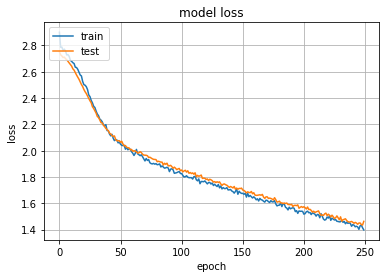

In [37]:
plt.figure()
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

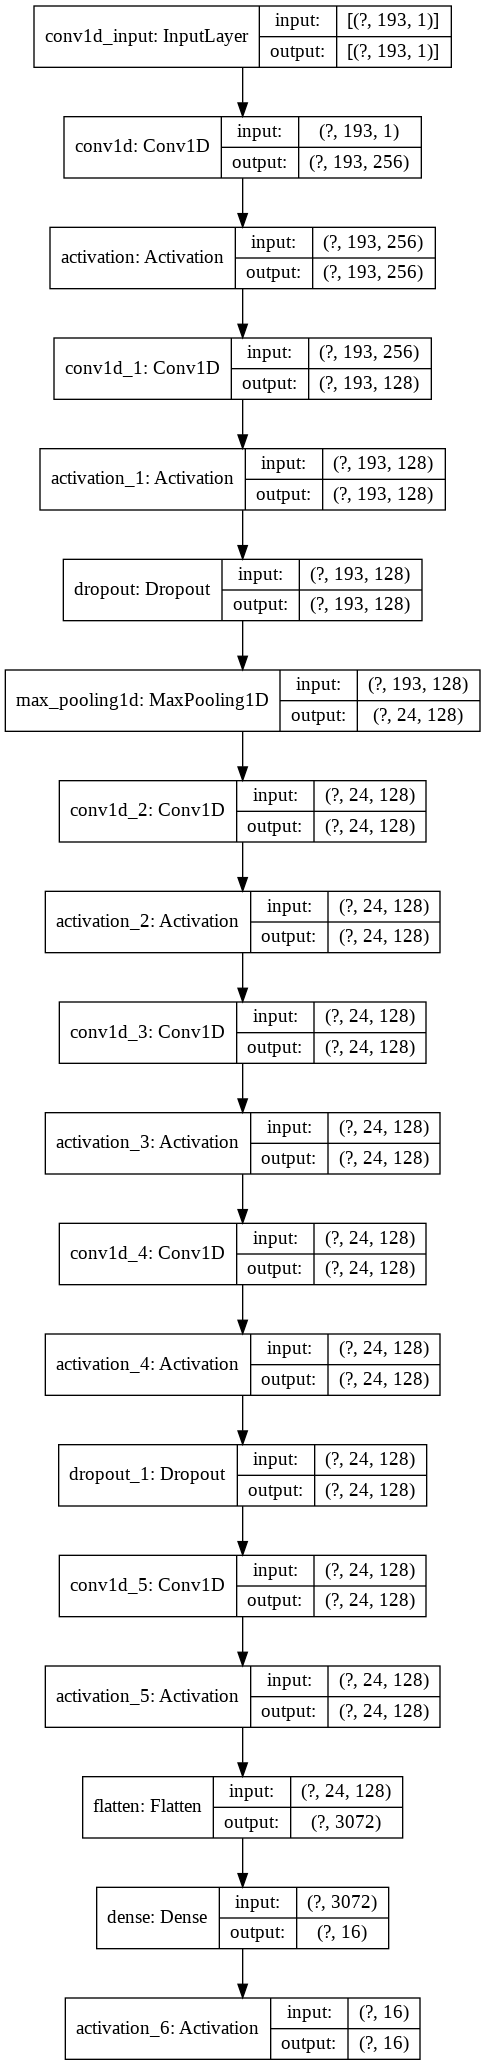

In [38]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

dot_img_file = '/content/drive/My Drive/My_AI/img.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)


SAVING THE MODEL

In [39]:
model_name = 'Emotion_Voice_Detection_CNN.h5'
path = '/content/drive/My Drive/My_AI/'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_CNN.h5 


In [41]:
import json
model_json = model.to_json()
with open("/content/drive/My Drive/My_AI/Voice-Emotion-Detector-master/model.json", "w") as json_file:
    json_file.write(model_json)

LOADING THE MODEL

In [49]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('/content/drive/My Drive/My_AI/Voice-Emotion-Detector-master/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/saved_models/Emotion_Voice_Detection_CNN.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 48.52%


Predicting emotions on the test data

In [50]:
preds = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)
preds1=preds.argmax(axis=1)

abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))
preddf = pd.DataFrame({'predictedvalues': predictions})

actual=y_test.argmax(axis=1)

abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

actualdf = pd.DataFrame({'actualvalues': actualvalues})
finaldf = actualdf.join(preddf)

finaldf[10:20]

9/9 [==============================] - 0s 42ms/step


,actualvalues,predictedvalues
10,female_happy,female_surprised
11,male_disgust,male_sad
12,female_surprised,female_surprised
13,female_sad,female_surprised
14,male_calm,male_calm
15,female_surprised,female_surprised
16,male_fearful,male_calm
17,female_happy,female_surprised
18,male_calm,male_calm
19,female_surprised,female_surprised


In [51]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,23
female_calm,19
female_disgust,22
female_fearful,15
female_happy,15
female_neutral,11
female_sad,24
female_surprised,13
male_angry,16


In [52]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,19
female_calm,33
female_disgust,16
female_fearful,14
female_happy,11
female_neutral,10
female_sad,11
female_surprised,34
male_angry,23
